<a href="https://colab.research.google.com/github/Saulo5/3D_shapes/blob/main/Interview_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fabrica AI interview (1/2)
Depending on your choice in the Google Form, you have 30 minutes for Algorithms and Datascience and/or 20 minutes for Embedded C/++ and/or 20 minutes for Electronics. Time started by opening this Colab. To finish the interview and put a link into the interview Google Form. To do so
1. Click File → Save a copy in Drive (or "Copy to Drive" from the toolbar)
2. Generate a link from the resulting copy with "Editor" privileges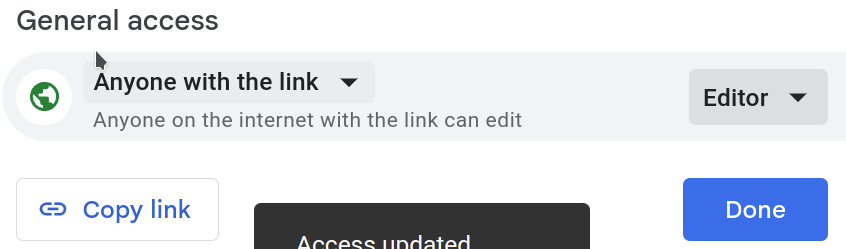
3. Write your solution
3. Put it into the Google Form
4. Submit the Google Form
5. Please don't edit the file afterward, so that it has last edit within (30)+(20)+(20) minutes from opening the Google Form.

**Start with the tasks you feel the most comfortable with**, not from the start. It's ok not to finish everything. Table of contents:
- Algorithm
- Datascience
- Embedded C/++
- Electronics

If you come up incrementaly with faster/better solutions, leave the previous solutions as well (aka brute force).

You can google/look into docummentation, please don't collaborate with other people :) There'll be another 30 minutes face2face interview.

Write the code directly in the gColab directly.

In [ ]:
# Saul Nieto

## Algorithms

![BinarySearchTree](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.btechsmartclass.com%2Fdata_structures%2Fds_images%2FBST%2520Example.png&f=1&nofb=1)

How would you find the 2nd largest value in any binary search tree. The tree has at least 2 nodes.


In [20]:
class BinaryTreeNode(object):

    def __init__(self, parent, value, left=None, right=None):
        self.parent = parent
        self.value = value
        self.left  = left
        self.right = right

        if self.left:
            self.left.parent = self
        if self.right:
            self.right.parent = self

# TODO: implement any other functions

def get_second_largest(node: BinaryTreeNode) -> BinaryTreeNode:
  
  if node.value is None:
        return None

  # Find the largest node
  largest = node 
  while largest.right is not None:
      largest = largest.right

  # If the largest node has a left subtree, the second largest is the largest node in the left subtree
  if largest.left is not None:
      second_largest = largest.left
      while second_largest.right is not None:
          second_largest = second_largest.right
  else:
      # Otherwise, the second largest is the parent of the largest node
      second_largest = largest.parent
      while second_largest is not None and second_largest.value < largest.value:
          second_largest = second_largest.parent
          
  # If the root node is the largest, return None
  if second_largest == node:
      return None
      
  return second_largest # TODO: implement

root = BinaryTreeNode(None, 25, 
                      BinaryTreeNode(None, 15,
                                     BinaryTreeNode(None, 6),),
                      BinaryTreeNode(None, 39))

second = get_second_largest(root)

print(second)

None


What is the time complexity of your algorithm? 

In [ ]:
# TODO: time complexity is O(h) where h is the height of the tree.

## Datascience
We have a dataset `df` with 100 data points, each with 4 features (`A`, `B`, `C`, `D`). `ID`s of the `train`, `dev` and `test` set are provided.

Using `numpy`/`pandas`, normalize the dataset by a normalization of your choice (write the math, there are multiple correct questions). 

For context: Imagine the dataset will be processed with K neares neighbors after the normalization. Later each row will be hand-labeled with several classes and used for classification.

In [21]:
# Do not edit, dataset creation
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randint(0, 100, size=(100, 4)), columns=list('ABCD')) / np.random.randint(1, 10, size=(4))
df = df * [1e7, 1e-7, 1, 3] - [4, 4, -1, 4]
train, dev, test = np.arange(0, 60), np.arange(60, 80), np.arange(80, 100)
df.loc[train].head()

,A,B,C,D
0,3.333329e+06,-3.999992,2.142857,67.0
1,8.333329e+06,-3.999996,3.285714,44.0
2,1.216667e+08,-3.999996,12.571429,31.0
3,8.666666e+07,-3.999994,4.285714,84.0
4,1.116667e+08,-3.999994,10.142857,62.0


In [27]:
# dataset subsets
print(f'Subset sizes: {[df.loc[x].shape for x in [train, dev, test]]}')

# TODO: correctly normalize `df`
# Calculate the mean and standard deviation of each feature in the training set
train_mean = np.mean(train, axis=0)
train_std = np.std(train, axis=0)

# Standardize the training set
train_data_standardized = (train - train_mean) / train_std

# Use the same mean and standard deviation to standardize the dev and test sets
dev_data_standardized = (dev - train_mean) / train_std
test_data_standardized = (test - train_mean) / train_std
print(train_data_standardized)

df.describe()

Subset sizes: [(60, 4), (20, 4), (20, 4)]
[-1.7034199  -1.64567685 -1.5879338  -1.53019075 -1.47244771 -1.41470466
 -1.35696161 -1.29921857 -1.24147552 -1.18373247 -1.12598942 -1.06824638
 -1.01050333 -0.95276028 -0.89501723 -0.83727419 -0.77953114 -0.72178809
 -0.66404504 -0.606302   -0.54855895 -0.4908159  -0.43307286 -0.37532981
 -0.31758676 -0.25984371 -0.20210067 -0.14435762 -0.08661457 -0.02887152
  0.02887152  0.08661457  0.14435762  0.20210067  0.25984371  0.31758676
  0.37532981  0.43307286  0.4908159   0.54855895  0.606302    0.66404504
  0.72178809  0.77953114  0.83727419  0.89501723  0.95276028  1.01050333
  1.06824638  1.12598942  1.18373247  1.24147552  1.29921857  1.35696161
  1.41470466  1.47244771  1.53019075  1.5879338   1.64567685  1.7034199 ]


,A,B,C,D
count,1.000000e+02,100.000000,100.000000,100.000000
mean,8.120000e+07,-3.999995,8.938571,44.250000
std,4.566142e+07,0.000003,4.066052,28.856795
min,1.666663e+06,-4.000000,1.000000,-2.000000
25%,4.333333e+07,-3.999998,6.142857,18.500000
50%,8.166666e+07,-3.999995,9.428571,43.500000
75%,1.204167e+08,-3.999993,12.321429,67.250000
max,1.650000e+08,-3.999990,15.142857,92.000000


## Embedded C/++

Write a function to compute the median of an array. Do not import additional libraries, write the algorithm.

In [ ]:
%%writefile median.cpp

#include <iostream>
#include <cstdlib>

using namespace std;


// TODO: rewrite the function below to return median instead of the first element
//
// Bonus (if you have done the whole sheet and are bored):
// Solve this with constant memory without modyfying the source array
// (i.e. if the length wasn't set to 5 but was unlimited, it would still only
// use a couple variables and wouldn't create another array)
// OR
// Solve this in linear time (on average is enough)
//
// !!!!!!!! Use just plain C++, no median(), no sort(), swap(), etc. !!!!!!!!
// !!!!!!!! The array is always length 5, you don't need measure it's length or
// deal with the case where the lenght is even !!!!!!!!
//
int median_of_5(int arr[]) {
    return arr[0];
}


int main(int argc, char** argv) {
    // Check if there are enough arguments to calculate the median
    if (argc < 2) {
        cerr << "Error: Not enough arguments provided." << endl;
        return 1;
    }

    // Parse the list of numbers from the command line arguments
    int* arr = new int[5];
    for (int i = 0; i < 5; i++) {
        arr[i] = atoi(argv[i + 1]);
    }

    // Calculate the median of the list `arr`
    float median = median_of_5(arr);

    cout << "The median of the list is: " << median << endl;

    delete[] arr;
    return 0;
}

Writing median.cpp


In [ ]:
%%shell

g++ median.cpp -o output
./output 3 5 7 2 42
./output 3 2 1 4 5 
./output 42 42 42 42 42

The median of the list is: 3
The median of the list is: 3
The median of the list is: 42


# Electronics

To add components to the electronics simulator click on “Draw” in top left and select a component. All components (including wires) need to be connected at their ends, they will show up red on the joint.

If the page doesn't work for you, state that below and try to end correspondingly earlier, we'll waive this section and interview electronics completely in person.

---
---

We want to communicate between 2 devices over a single line in both directions (could be I2C SDA but not very relevant). If they are both using the same voltage you can just connect them directly by a wire, viz below:

https://tinyurl.com/2qa5k8vz


---


How can we connect them if one is at 5V and one at 3.3V? Don’t change anything inside the boxes and just add stuff in between. Use only passive components.

When you are finished, click “File” -> “Export as link” and add your link below.

https://tinyurl.com/2ea7wdhp


---


Passive components will not work if the low voltage device is too low in voltage. How can you connect the two in that case?

Paste an exported link in the form and add your link below.

https://tinyurl.com/2z6trwt9


In [ ]:
# link 1: 

In [ ]:
# link 2: 